# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


In [2]:
# Import API key
from api_keys import api_key

In [3]:
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set up url path as a string - City will be added to the query later 
url = 'http://api.openweathermap.org/data/2.5/weather?q='

In [7]:
# Establish varibales i.e. lists that will become the columns of the dataframe
names = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a count to track the number of cities I am looking at
count = 1

In [8]:
# Saving all config information - url is same as above
url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'Imperial'

In [9]:
# Trying to query just one city / show a response because I think I am out of API requests
query_url = f"{url}{city}&appid={api_key}&units={units}"
response = requests.get(query_url).json()
response

{'coord': {'lon': 140.83, 'lat': 35.73},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 45.75,
  'pressure': 1021,
  'humidity': 65,
  'temp_min': 44.01,
  'temp_max': 48},
 'visibility': 10000,
 'wind': {'speed': 2.24},
 'clouds': {'all': 40},
 'dt': 1575505204,
 'sys': {'type': 1,
  'id': 7955,
  'country': 'JP',
  'sunrise': 1575495067,
  'sunset': 1575530593},
 'timezone': 32400,
 'id': 2112802,
 'name': 'Hasaki',
 'cod': 200}

In [10]:
# Loop through all cities to collect responses of the data we need
# Append the data with the criteria from API Geo Coordinates response
for city in cities:
    query_url = f"{url}{city}&APPID={api_key}&units={units}"
    try:
        response = requests.get(query_url).json()
        names.append(response['name'])
    except:
        print("City Not Found")
    else:
        city_name = response['name']
        print(f'Processing record {count} | {city_name}')
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        count = count + 1


Processing record 1 | Mataura
Processing record 2 | Dongsheng
Processing record 3 | Provideniya
Processing record 4 | Souillac
Processing record 5 | Saint-Philippe
Processing record 6 | Hilo
Processing record 7 | Atar
Processing record 8 | Uarini
Processing record 9 | Ushuaia
Processing record 10 | Sitka
Processing record 11 | Port Alfred
Processing record 12 | Faanui
Processing record 13 | Nikolskoye
Processing record 14 | Asyut
Processing record 15 | Iquique
Processing record 16 | Rikitea
City Not Found
Processing record 17 | Seoul
Processing record 18 | Princeton
Processing record 19 | Kavaratti
Processing record 20 | Cabo San Lucas
City Not Found
Processing record 21 | Carnarvon
City Not Found
Processing record 22 | Yakeshi
Processing record 23 | Buala
City Not Found
Processing record 24 | Maceio
City Not Found
Processing record 25 | Vaini
Processing record 26 | Jalu
Processing record 27 | Palmer
Processing record 28 | Buchanan
Processing record 29 | Tiksi
Processing record 30 | Co

Processing record 236 | Nisko
Processing record 237 | Desert Hot Springs
Processing record 238 | Luganville
City Not Found
Processing record 239 | Palana
Processing record 240 | Tazovskiy
Processing record 241 | Westport
Processing record 242 | Shelburne
Processing record 243 | Esperance
Processing record 244 | Parkersburg
Processing record 245 | Veraval
Processing record 246 | Airai
Processing record 247 | Flinders
Processing record 248 | Eskisehir
Processing record 249 | Ust-Karsk
Processing record 250 | Bignona
Processing record 251 | Rundu
Processing record 252 | Brae
Processing record 253 | Kirensk
Processing record 254 | Sao Jose da Coroa Grande
Processing record 255 | Luderitz
Processing record 256 | Sao Filipe
Processing record 257 | Tual
City Not Found
Processing record 258 | Tsnori
Processing record 259 | Alyangula
Processing record 260 | Udachnyy
Processing record 261 | Tongchuan
Processing record 262 | Chaumont
Processing record 263 | Mwinilunga
Processing record 264 | Yang

Processing record 472 | Edd
Processing record 473 | Cooma
Processing record 474 | Snezhnogorsk
Processing record 475 | Thinadhoo
City Not Found
Processing record 476 | San Quintin
Processing record 477 | Egvekinot
Processing record 478 | Dudinka
Processing record 479 | Kuching
Processing record 480 | Mattru
Processing record 481 | Bay Roberts
Processing record 482 | Conakry
Processing record 483 | Daru
Processing record 484 | Bambous Virieux
Processing record 485 | Porto Nacional
Processing record 486 | Sylvan Lake
City Not Found
Processing record 487 | Tagusao
Processing record 488 | Katsuura
Processing record 489 | Aykhal
Processing record 490 | Tarakan
City Not Found
Processing record 491 | Merrill
Processing record 492 | Morehead
Processing record 493 | Soto la Marina
Processing record 494 | Jutai
Processing record 495 | Melilla
City Not Found
Processing record 496 | Mildura
Processing record 497 | Znamenskoye
Processing record 498 | Totness
Processing record 499 | Nizhniy Baskunch

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a City Weather dataframe
weather = {
    "City": names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

city_weather = pd.DataFrame(weather)
city_weather.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [13]:
# Conver the city weather into a csv
city_weather.to_csv('cities.csv')
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,99,NZ,1575505207,50,-46.19,168.86,58.14,14.45
1,Dongsheng,93,CN,1575505207,53,29.72,112.52,47.30,4.36
2,Provideniya,75,RU,1575505207,62,64.42,-173.23,19.40,22.37
3,Souillac,89,FR,1575505207,86,45.60,-0.60,41.00,4.70
4,Saint-Philippe,90,CA,1575505207,92,45.36,-73.48,33.01,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

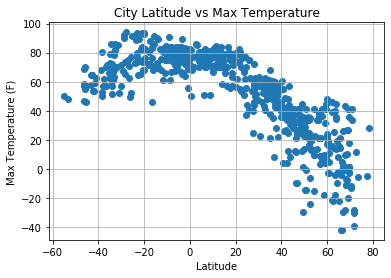

In [14]:
# Calculate the Temperature (F) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("temp-lat.png")

#### Latitude vs. Humidity Plot

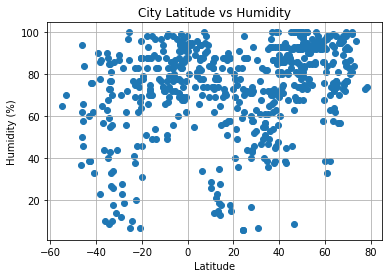

In [15]:
# Calculate the Humidity (%) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("humidity-lat.png")

#### Latitude vs. Cloudiness Plot

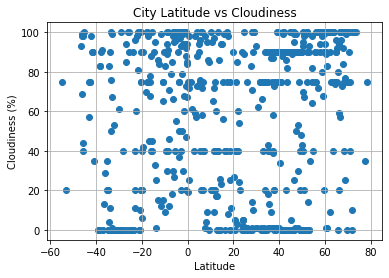

In [16]:
# Calculate the Cloudiness (%) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("cloudiness-lat.png")

#### Latitude vs. Wind Speed Plot

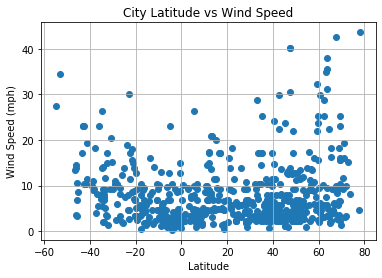

In [17]:
# Calculate the Wind Speed (MPH) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("windspeed-lat.png")